### Library 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_context('talk')
warnings.filterwarnings(action='ignore')

### Data 불러오기

In [2]:
train = pd.read_csv('./Data/application_train.csv')
test = pd.read_csv('./Data/application_test.csv')

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [5]:
train['EXT_SOURCE_1'].value_counts(dropna=False)

NaN         173378
0.581015         5
0.546426         5
0.443982         5
0.765724         5
             ...  
0.658473         1
0.318295         1
0.834644         1
0.485406         1
0.734460         1
Name: EXT_SOURCE_1, Length: 114585, dtype: int64

In [6]:
train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.000000,3.068510e+05,246546.000000
mean,0.502130,5.143927e-01,0.510853
std,0.211062,1.910602e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505998,5.659614e-01,0.535276
75%,0.675053,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


### Feature Engineering 전 데이터 세트 결합

In [7]:
apps = pd.concat([train, test])

#### EXT_SOURCE FEATURE의 평균과 표준편차

In [8]:
apps['EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

In [9]:
apps['EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)

In [10]:
apps[['EXT_SOURCE_MEAN', 'EXT_SOURCE_STD']].head()

,EXT_SOURCE_MEAN,EXT_SOURCE_STD
0,0.161787,0.092026
1,0.466757,0.219895
2,0.642739,0.122792
3,0.650442,NaN
4,0.322738,NaN


In [11]:
apps['EXT_SOURCE_STD'] = apps['EXT_SOURCE_STD'].fillna(apps['EXT_SOURCE_STD'].mean())

#### 전체 대출대비 비율 산정

In [12]:
apps['ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_CREDIT']
apps['GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_CREDIT']
apps['CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] = apps['AMT_GOODS_PRICE']

#### 소득대비 비율 산정

In [13]:
apps['ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_INCOME_TOTAL']
apps['CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT'] / apps['AMT_INCOME_TOTAL']
apps['GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_INCOME_TOTAL']
apps['CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['CNT_FAM_MEMBERS']

#### 나이, 회사근속연수 비율 산정

In [14]:
apps['EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED'] / apps['DAYS_BIRTH']
apps['INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_EMPLOYED']
apps['INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_BIRTH']
apps['CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
apps['CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']

#### Label Encoding

In [15]:
object_columns = apps.dtypes[apps.dtypes=='object'].index.tolist()

for column in object_columns :
    apps[column] = pd.factorize(apps[column])[0]

In [16]:
apps_train = apps[~apps['TARGET'].isnull()]
apps_test = apps[apps['TARGET'].isnull()]

#### train_test_split

In [17]:
from sklearn.model_selection import train_test_split

ftr_app = apps_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = apps_train['TARGET']

X_train, X_val, y_train, y_val = train_test_split(ftr_app, target_app, test_size=0.3, random_state=42)

In [18]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    n_jobs=-1,
    n_estimators=1000,
    learning_rate=0.02,
    num_leaves=32,
    subsample=0.8,
    max_depth=12,
    silent=-1,
    verbose=-1
)

clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric='auc', verbose=100, early_stopping_rounds=100)

[100]	training's auc: 0.76008	training's binary_logloss: 0.247515	valid_1's auc: 0.748473	valid_1's binary_logloss: 0.249598
[200]	training's auc: 0.780358	training's binary_logloss: 0.240487	valid_1's auc: 0.759295	valid_1's binary_logloss: 0.245643
[300]	training's auc: 0.795178	training's binary_logloss: 0.235759	valid_1's auc: 0.76439	valid_1's binary_logloss: 0.244059
[400]	training's auc: 0.807001	training's binary_logloss: 0.232052	valid_1's auc: 0.765977	valid_1's binary_logloss: 0.243557
[500]	training's auc: 0.817412	training's binary_logloss: 0.228718	valid_1's auc: 0.766637	valid_1's binary_logloss: 0.24332
[600]	training's auc: 0.826862	training's binary_logloss: 0.225672	valid_1's auc: 0.767143	valid_1's binary_logloss: 0.243153
[700]	training's auc: 0.835174	training's binary_logloss: 0.222867	valid_1's auc: 0.767434	valid_1's binary_logloss: 0.243042
[800]	training's auc: 0.843626	training's binary_logloss: 0.220023	valid_1's auc: 0.76753	valid_1's binary_logloss: 0.242

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

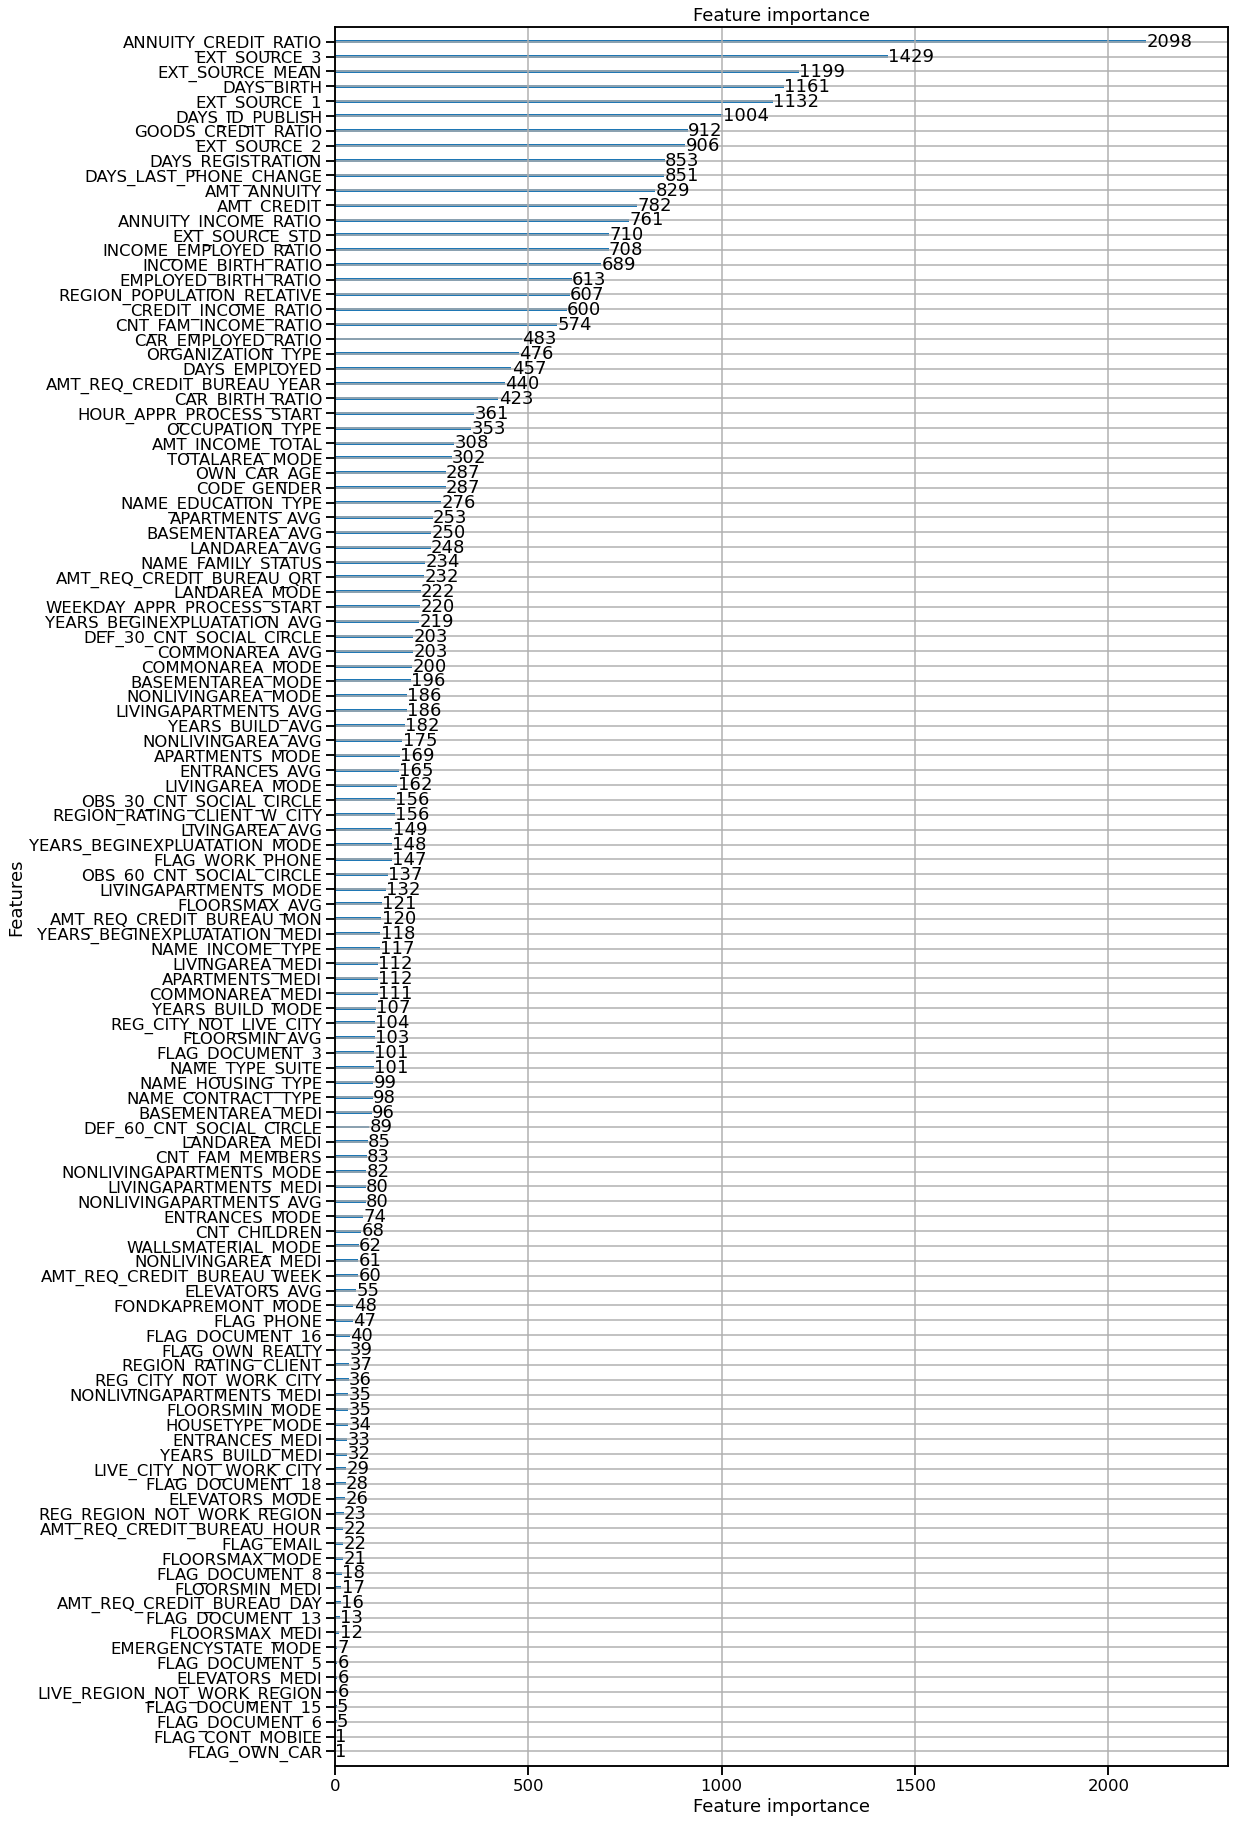

In [19]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16,32))

In [20]:
preds = clf.predict_proba(apps_test.drop(['SK_ID_CURR', 'TARGET'], axis=1))[:, 1]

In [21]:
apps_test['TARGET'] = preds
apps_test[['SK_ID_CURR', 'TARGET']].to_csv('./result/02_baseline.csv', index=False)